In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests 
import datetime as dt 
from datetime import timedelta, datetime 
from io import StringIO

In [29]:
v = yf.Ticker("V")

visa = pd.DataFrame.from_dict(v.info)

v = visa.head(1).T
v

,0
address1,PO Box 8999
city,San Francisco
state,CA
zip,94128-8999
country,United States
...,...
grossMargins,0.97676
ebitdaMargins,0.69903
operatingMargins,0.66943
financialCurrency,USD


In [43]:
visa = yf.download("V",
                    interval="1wk",
                    prepost=False,
                    start=dt.datetime.today() - dt.timedelta(days=365*10),
                    end = dt.datetime.today(),
                    repair=True).\
                                reset_index().\
                                drop(columns=["Repaired?"]).\
                                rename(columns=str.lower)

visa.head()

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj close,volume
0,2013-07-08,46.837502,47.682499,46.452499,47.680000,44.467899,37541200
1,2013-07-15,47.875000,47.997501,47.035000,47.480000,44.281380,48149200
2,2013-07-22,47.552502,49.000000,46.415001,48.299999,45.046146,64267200
3,2013-07-29,48.215000,48.724998,42.747501,46.000000,42.901077,205746800
4,2013-08-05,46.000000,46.285000,44.889999,44.952499,41.924156,66678000


In [47]:
visa["year"] = visa["date"].dt.year
visa.head()

,date,open,high,low,close,adj close,volume,year
0,2013-07-08,46.837502,47.682499,46.452499,47.680000,44.467899,37541200,2013
1,2013-07-15,47.875000,47.997501,47.035000,47.480000,44.281380,48149200,2013
2,2013-07-22,47.552502,49.000000,46.415001,48.299999,45.046146,64267200,2013
3,2013-07-29,48.215000,48.724998,42.747501,46.000000,42.901077,205746800,2013
4,2013-08-05,46.000000,46.285000,44.889999,44.952499,41.924156,66678000,2013


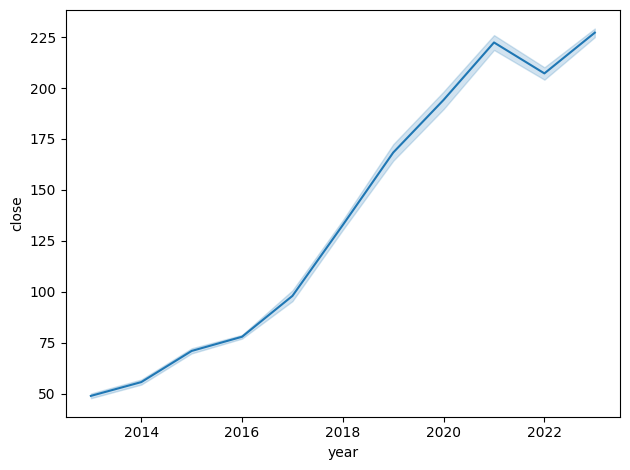

In [51]:
sns.lineplot(data=visa, x="year", y="close")

plt.tight_layout()
plt.show()